## Problem Statement :
**About Company**
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.
**Problem:**

em
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Objective of Notebook
**Aim:**

- Analyze customer data provided in data set (EDA)- 
Build various ML models that can predict loan approval

### Dataset Description
- 8 categorical variables
- 4 continous variables
- 1 variable to accommodate the loan ID

# Importing dataset and libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
pd.options.display.max_columns = None

pd.options.display.max_rows = None

np.set_printoptions(suppress=True)

In [9]:
plt.rcParams['figure.figsize'] = [15,8]

In [11]:
df = pd.read_csv('LoanApprovalPrediction.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Data Exploration

## Categorical Variable

In [20]:
df['Loan_ID'].value_counts(dropna =False)

LP001002    1
LP002296    1
LP002300    1
LP002301    1
LP002305    1
LP002308    1
LP002314    1
LP002315    1
LP002317    1
LP002318    1
LP002319    1
LP002328    1
LP002332    1
LP002335    1
LP002337    1
LP002341    1
LP002342    1
LP002297    1
LP002288    1
LP002231    1
LP002287    1
LP002236    1
LP002237    1
LP002239    1
LP002243    1
LP002244    1
LP002250    1
LP002255    1
LP002262    1
LP002263    1
LP002265    1
LP002266    1
LP002272    1
LP002277    1
LP002281    1
LP002284    1
LP002345    1
LP002347    1
LP002348    1
LP002357    1
LP002409    1
LP002418    1
LP002422    1
LP002424    1
LP002429    1
LP002434    1
LP002435    1
LP002443    1
LP002444    1
LP002446    1
LP002447    1
LP002448    1
LP002449    1
LP002453    1
LP002455    1
LP002408    1
LP002407    1
LP002403    1
LP002369    1
LP002361    1
LP002362    1
LP002364    1
LP002366    1
LP002367    1
LP002368    1
LP002370    1
LP002401    1
LP002377    1
LP002379    1
LP002386    1
LP002387    1
LP0023

In [22]:
df.shape

(598, 13)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [26]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [30]:
df.describe(include='object')

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,598,598,598,598,598,598,598
unique,598,2,2,2,2,3,2
top,LP001002,Male,Yes,Graduate,No,Semiurban,Y
freq,1,487,388,465,488,225,411


In [69]:
#drop the field 'Loan_ID'
df.drop('Loan_ID', axis=1, inplace=True)

In [32]:
df.Gender.value_counts(dropna = False)

Male      487
Female    111
Name: Gender, dtype: int64

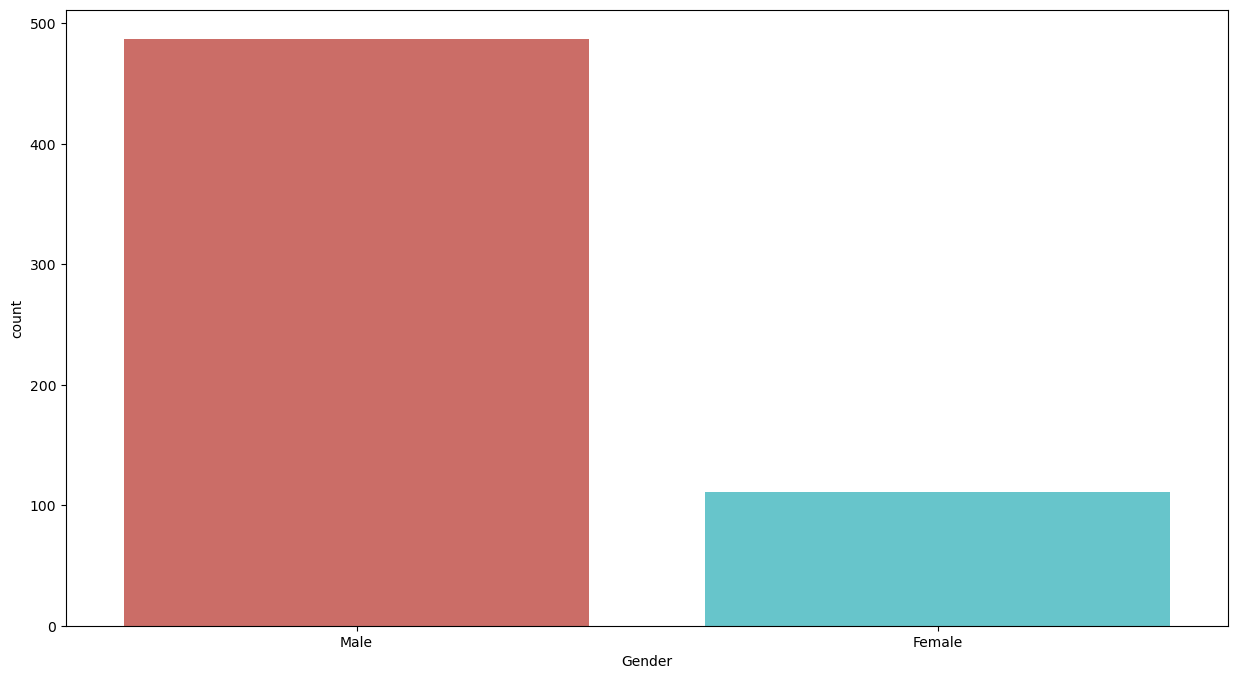

In [34]:
sns.countplot(data= df, x='Gender', palette= 'hls')
plt.show()

In [38]:
count_male = len(df[df['Gender']== 'Male'])
count_female = len(df[df['Gender']== 'Female'])
count_null = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((count_male / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((count_female / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((count_null / (len(df.Gender))*100)))

Percentage of Male applicant: 81.44%
Percentage of Female applicant: 18.56%
Missing values percentage: 0.00%


**The number of male applicants is higher compared to female applicants.**

In [40]:
df['Married'].value_counts(dropna = False)

Yes    388
No     210
Name: Married, dtype: int64

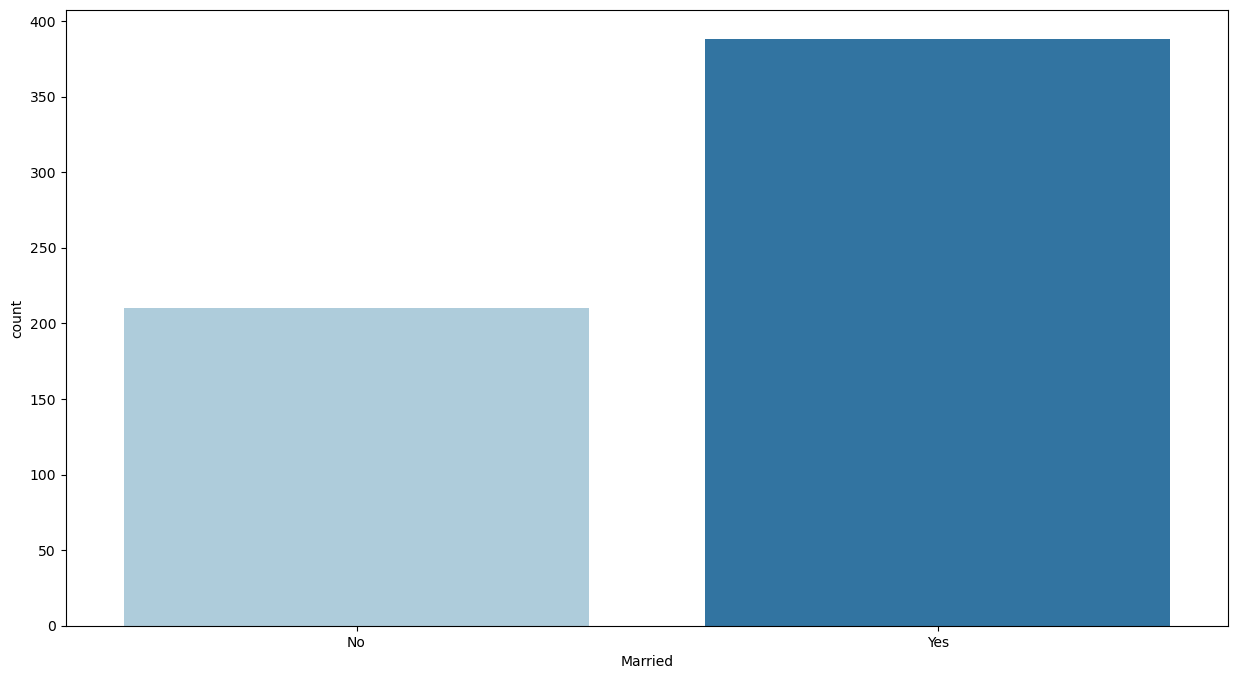

In [42]:
sns.countplot(df, x='Married', palette= 'Paired')
plt.show()

**The number of applicants that has been married is higher compared to applicants that hasn't married.**

In [48]:
count_married = len(df[df.Married == 'Yes'])
count_Notmarried = len(df[df.Married == 'No'])
count_nulls = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((count_married / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((count_Notmarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((count_nulls / (len(df.Married))*100)))

Percentage of married: 64.88%
Percentage of Not married applicant: 35.12%
Missing values percentage: 0.00%


In [63]:
df.Education.value_counts(dropna = False)

Graduate        465
Not Graduate    133
Name: Education, dtype: int64

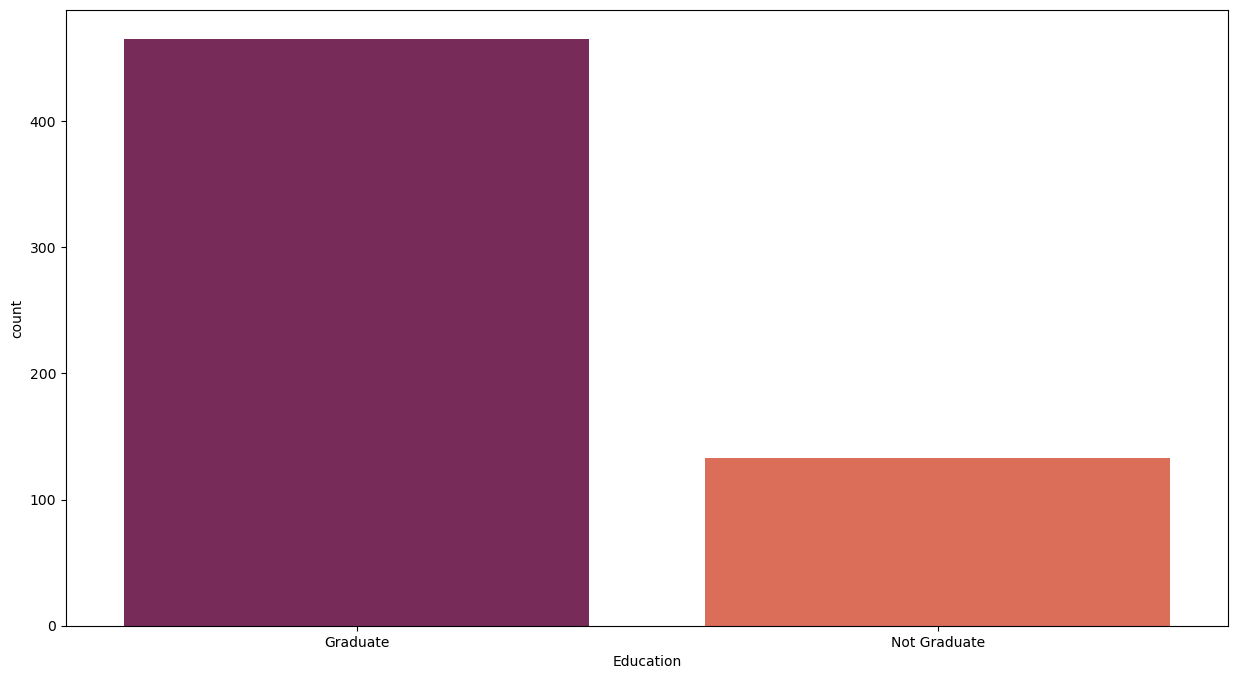

In [52]:
sns.countplot(df, x = 'Education', palette= 'rocket')
plt.show()

In [60]:
count_graduate = len(df[df.Education=='Graduate'])
count_nongraduate = len(df[df.Education=='Not Graduate'])
count_nulls1 = len(df[df.Education.isnull()])


print("Percentage of graduate applicant: {:.2f}%".format((count_graduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((count_nongraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((count_nulls1 / (len(df.Education))*100)))

Percentage of graduate applicant: 77.76%
Percentage of Not graduate applicant: 22.24%
Missing values percentage: 0.00%


**The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.**

In [65]:
df.Self_Employed.value_counts(dropna=False)

No     488
Yes    110
Name: Self_Employed, dtype: int64

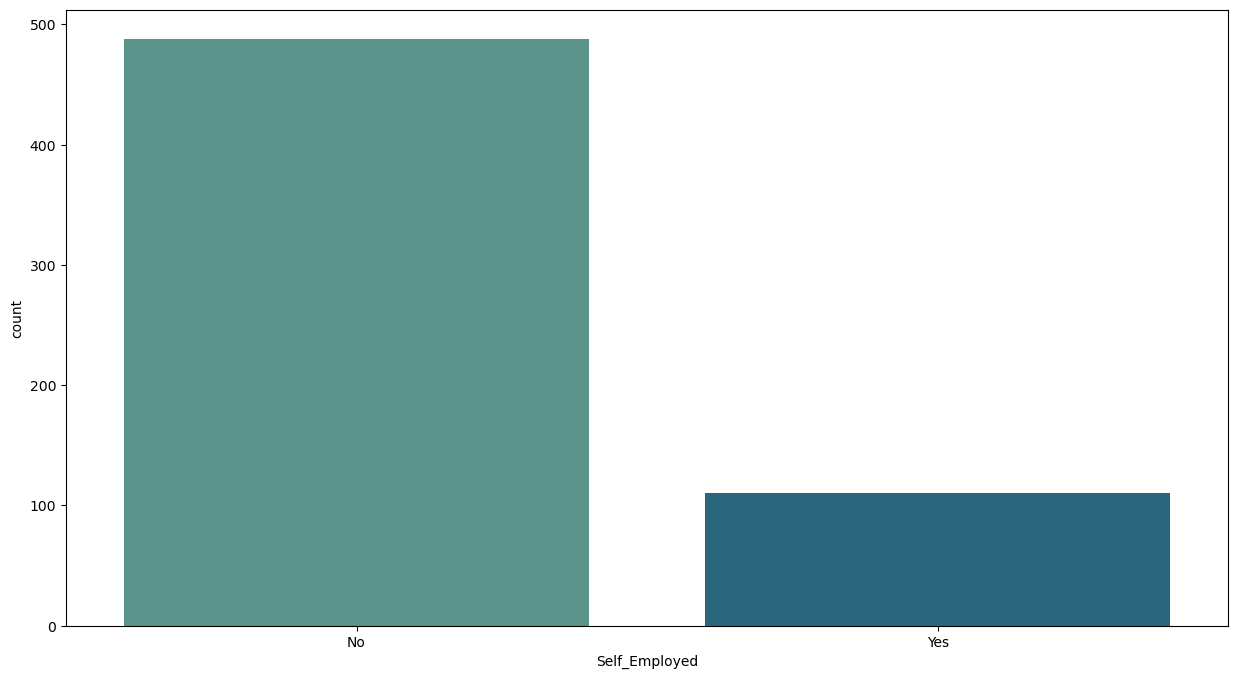

In [67]:
sns.countplot(df, x='Self_Employed', palette='crest')
plt.show()

In [69]:
count_No = len(df[df.Self_Employed == 'No'])
count_Yes = len(df[df.Self_Employed == 'Yes'])
count_Null = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((count_No / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((count_Yes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((count_Null / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.61%
Percentage of self employed: 18.39%
Missing values percentage: 0.00%


**The number of applicants that are not self employed is higher compared to applicants that are self employed.**

In [72]:
df.Credit_History.value_counts(dropna=False)

1.0    463
0.0     86
NaN     49
Name: Credit_History, dtype: int64

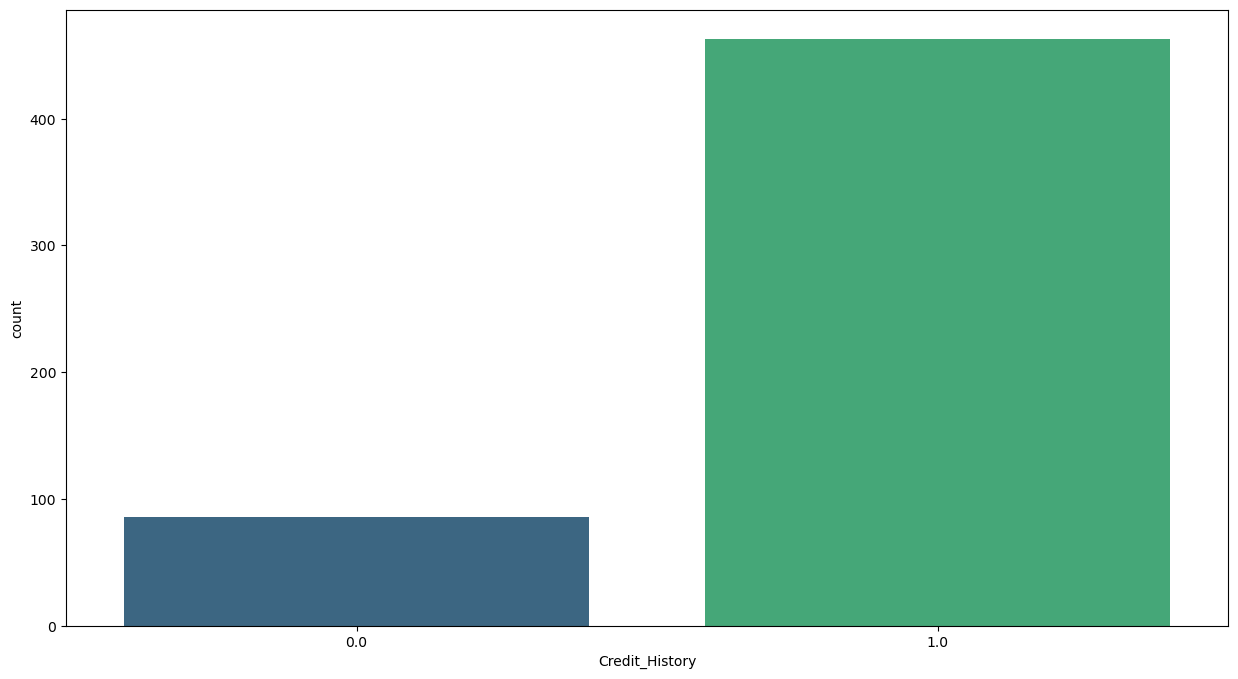

In [74]:
sns.countplot(df, x='Credit_History', palette='viridis')
plt.show()

In [76]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.42%
Percentage of Bad credit history: 14.38%
Missing values percentage: 8.19%


**The number of applicants that have good credit history is higher compared to applicants that have bad credit history.**

In [79]:
df.Property_Area.value_counts(dropna=False)

Semiurban    225
Urban        198
Rural        175
Name: Property_Area, dtype: int64

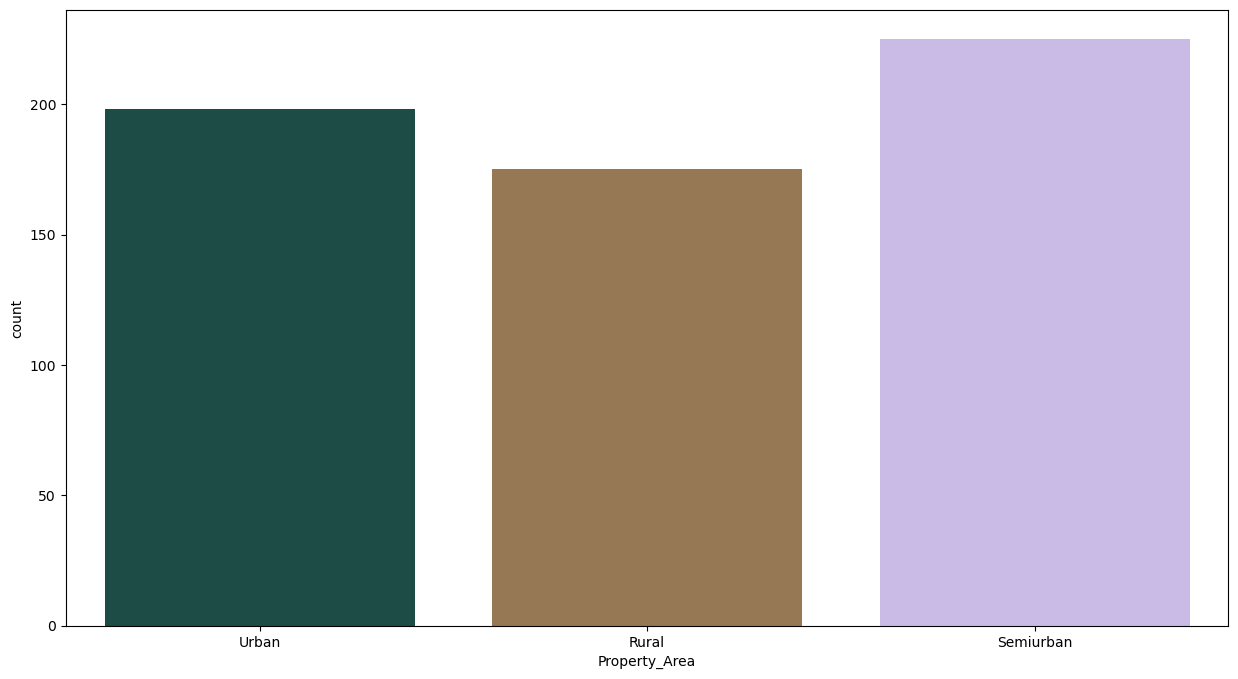

In [83]:
sns.countplot(df, x='Property_Area', palette='cubehelix')
plt.show()

In [85]:
count_urban = len(df[df.Property_Area == 'Urban'])
count_rural = len(df[df.Property_Area == 'Rural'])
count_semiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((count_urban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((count_rural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((count_semiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 33.11%
Percentage of Rural: 29.26%
Percentage of Semiurban: 37.63%
Missing values percentage: 0.00%


**This column has a balanced distribution between Urban, Rural, and Semiurban property area.**

In [88]:
df.Loan_Status.value_counts(dropna=False)

Y    411
N    187
Name: Loan_Status, dtype: int64

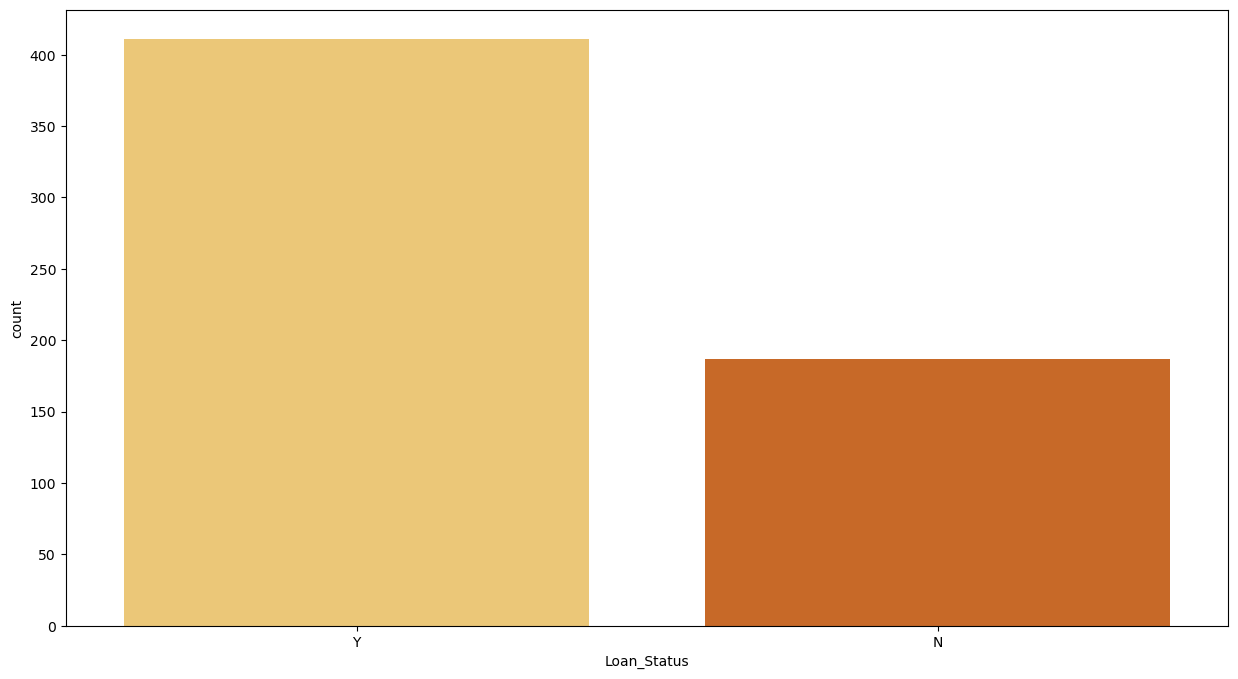

In [96]:
sns.countplot(df, x='Loan_Status', palette='YlOrBr')
plt.show()

In [98]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


**The number of approved loans is higher compared to rejected loans.** 

In [103]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    500
180.0     43
NaN       14
480.0     14
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

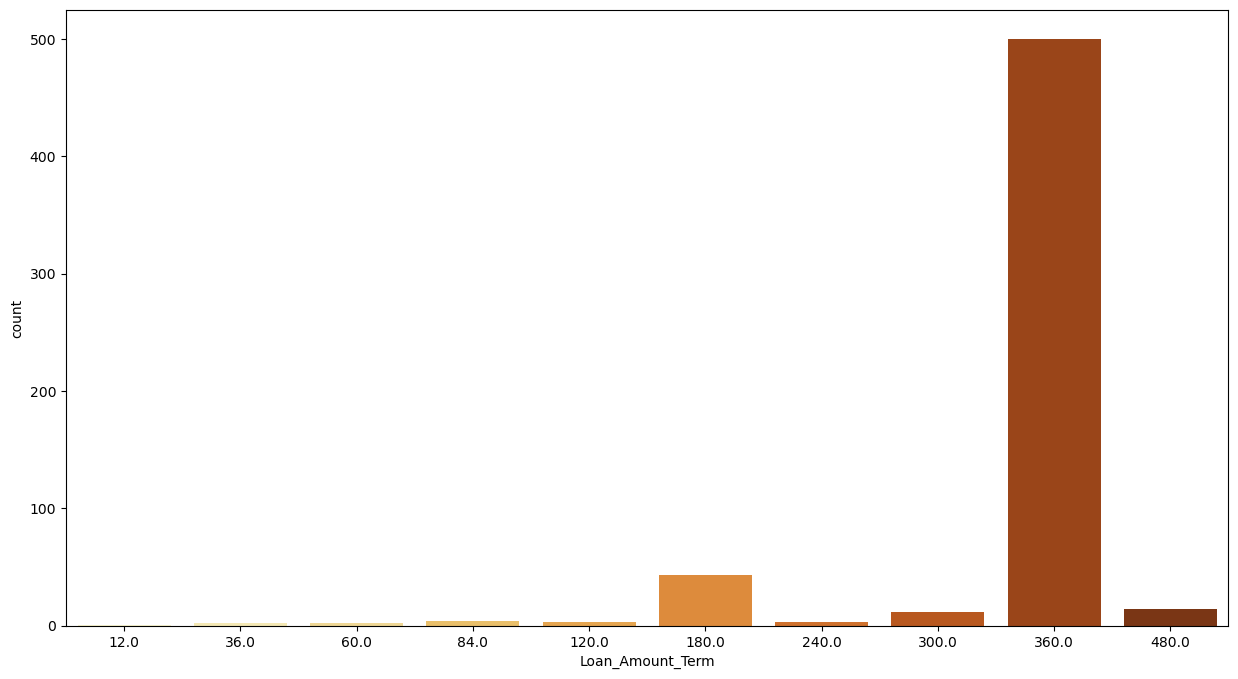

In [105]:
sns.countplot(df, x='Loan_Amount_Term', palette='YlOrBr')
plt.show()

In [107]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.17%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.67%
Percentage of 120: 0.50%
Percentage of 180: 7.19%
Percentage of 240: 0.50%
Percentage of 300: 2.01%
Percentage of 360: 83.61%
Percentage of 480: 2.34%
Missing values percentage: 2.34%


**As can be seen from the results, the 360 days loan duration is the most popular compared to others.**

# Numerical Variable

In [111]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,598.000000,598.000000,577.000000
mean,5292.252508,1631.499866,144.968804
std,5807.265364,2953.315785,82.704182
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3806.000000,1211.500000,127.000000
75%,5746.000000,2324.000000,167.000000
max,81000.000000,41667.000000,650.000000


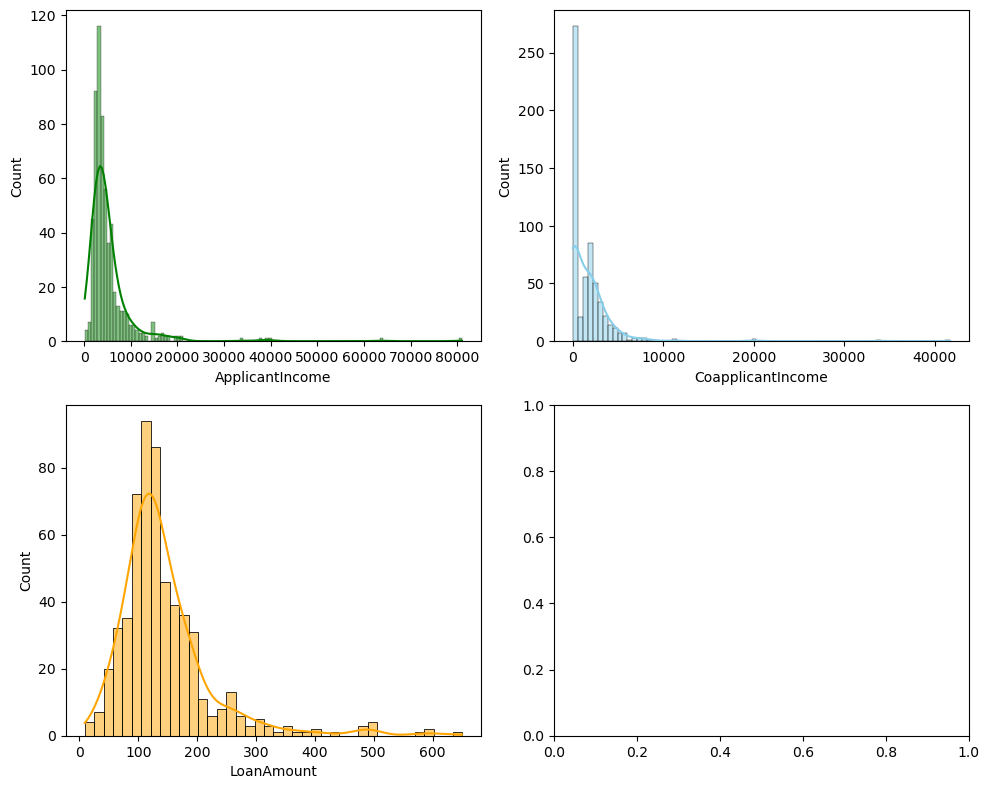

In [113]:
# Histogram Distribution
# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot histograms with KDE for each variable
sns.histplot(data=df, x="ApplicantIncome", kde=True, color='green', ax=axs[0, 0])
sns.histplot(data=df, x="CoapplicantIncome", kde=True, color='skyblue', ax=axs[0, 1])
sns.histplot(data=df, x="LoanAmount", kde=True, color='orange', ax=axs[1, 0])

plt.tight_layout()
plt.show()

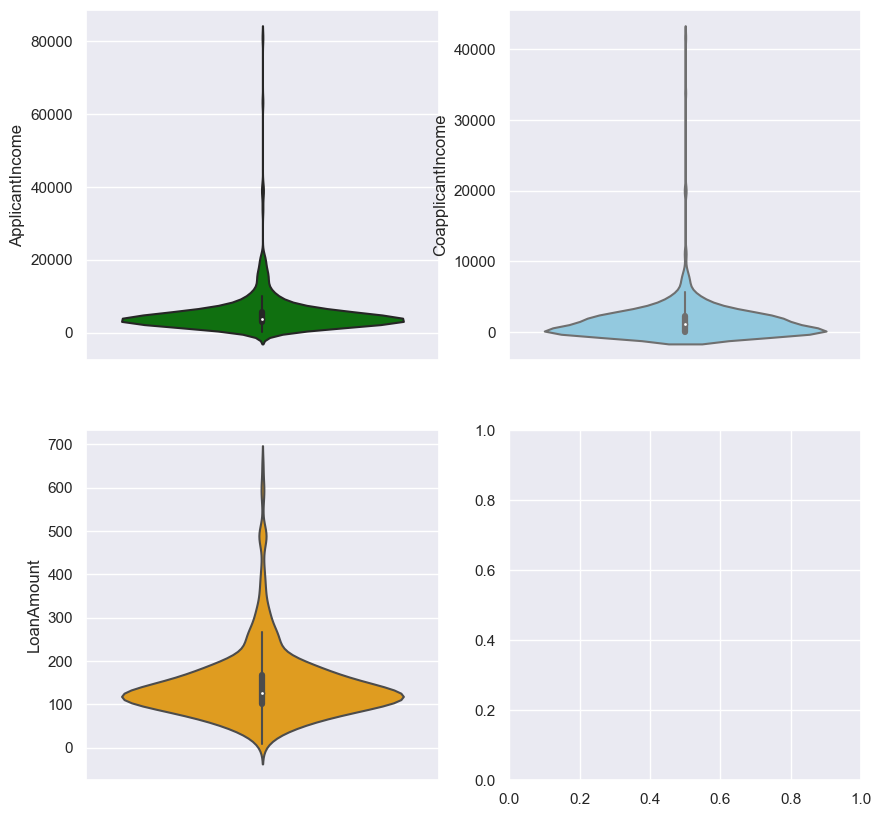

In [115]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

- The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers (can be seen from both histogram and violin plot).
- The distribution of Loan Amount Term is negativly skewed and it has outliers.

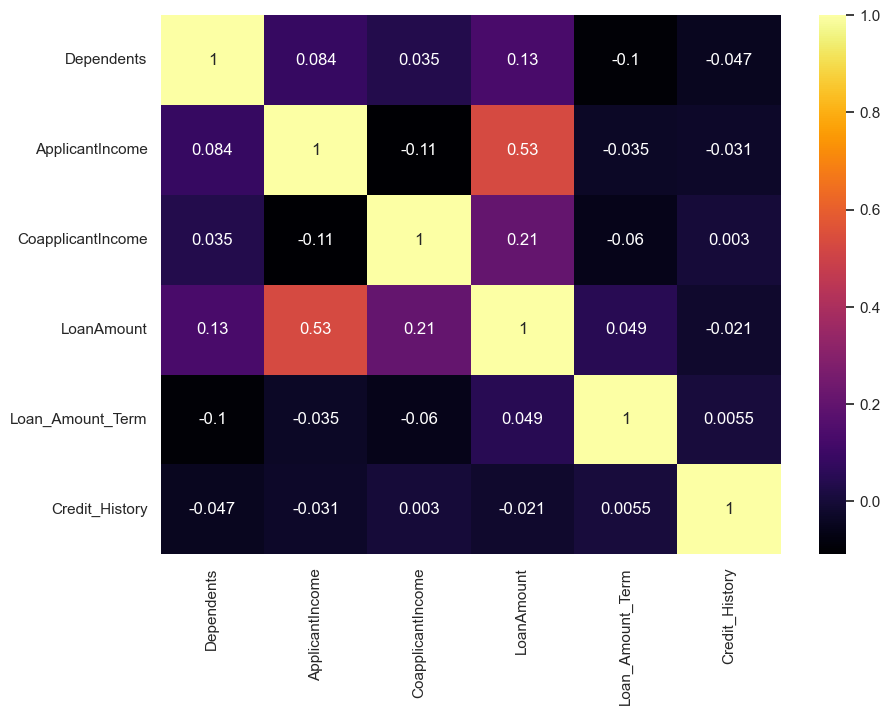

In [118]:
# Heatmap

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

**There is positive correlation between Loan Amount and Applicant Income.**

### Categorical Distribution

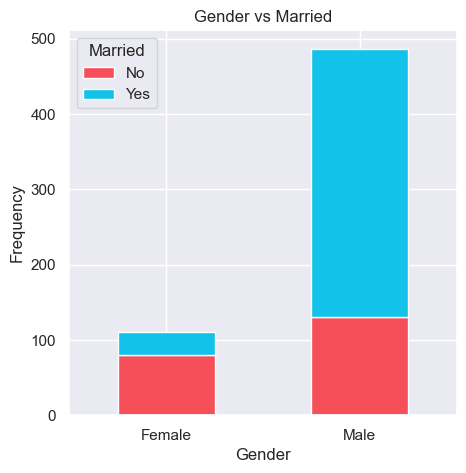

In [123]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

**Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.**

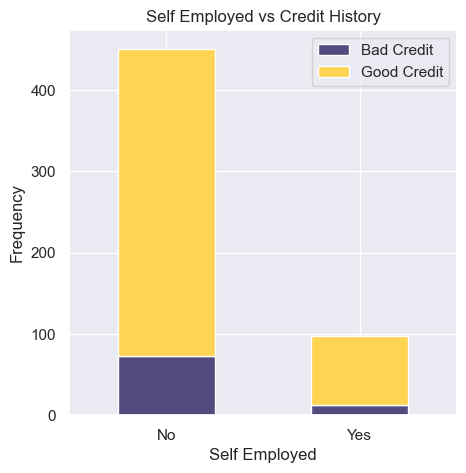

In [126]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

**Most not self employed applicants have good credit compared to self employed applicants.**

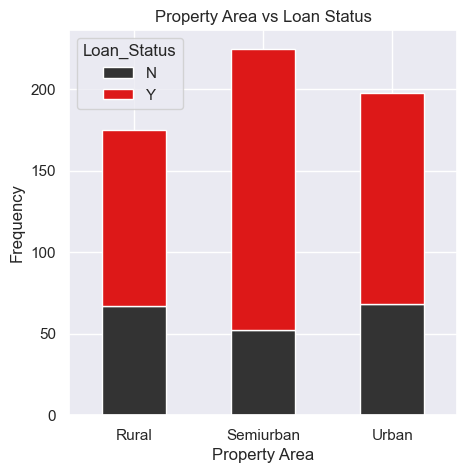

In [129]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

**Most of loan that got accepted has property in Semiurban compared to Urban and Rural.**

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

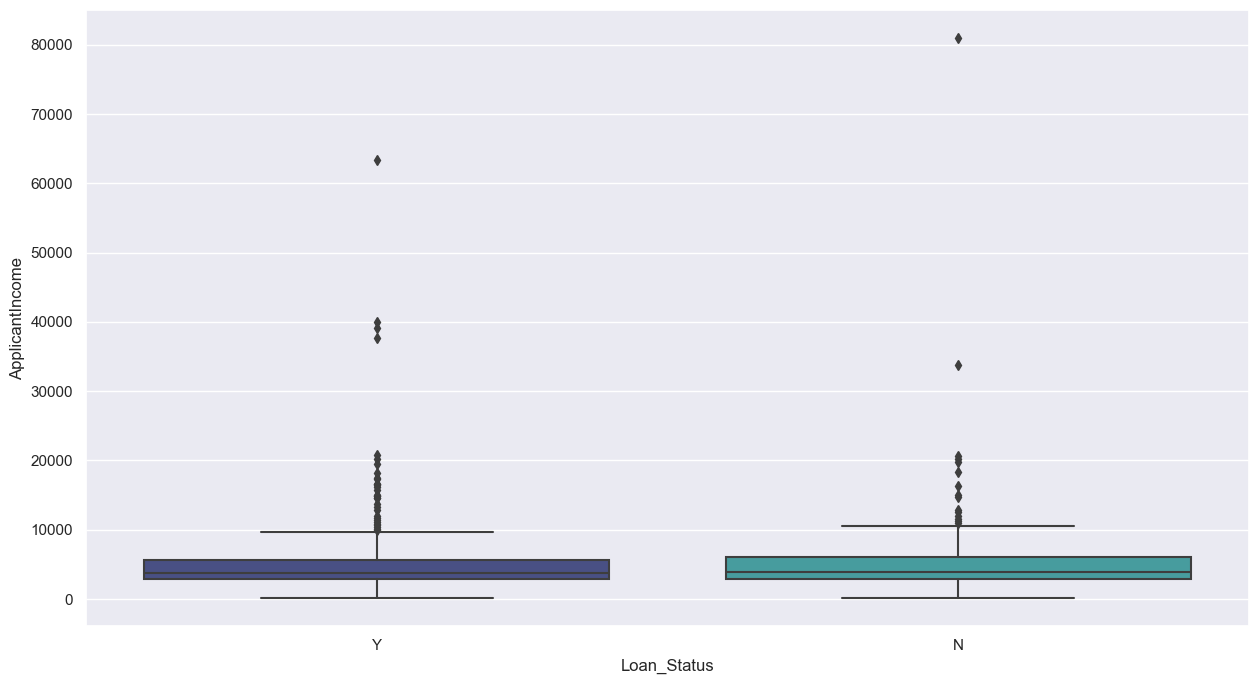

In [132]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako")

**It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed.**

<Axes: xlabel='CoapplicantIncome', ylabel='Loan_Status'>

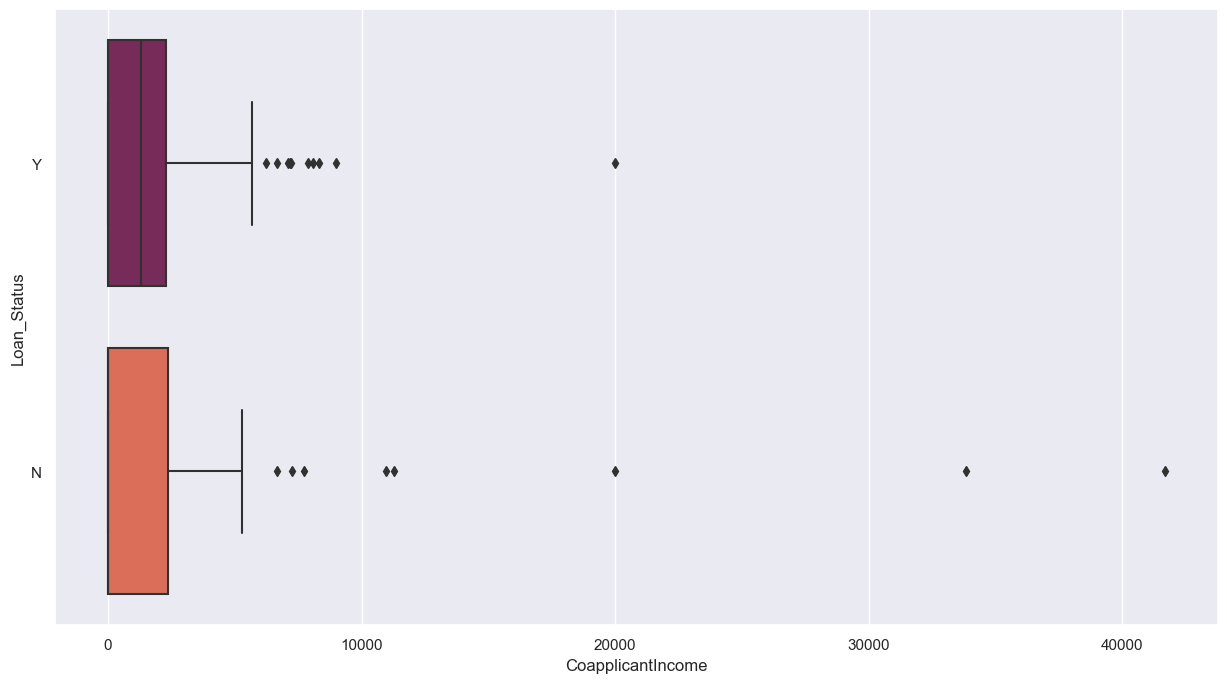

In [135]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket")

**It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.**

In [140]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

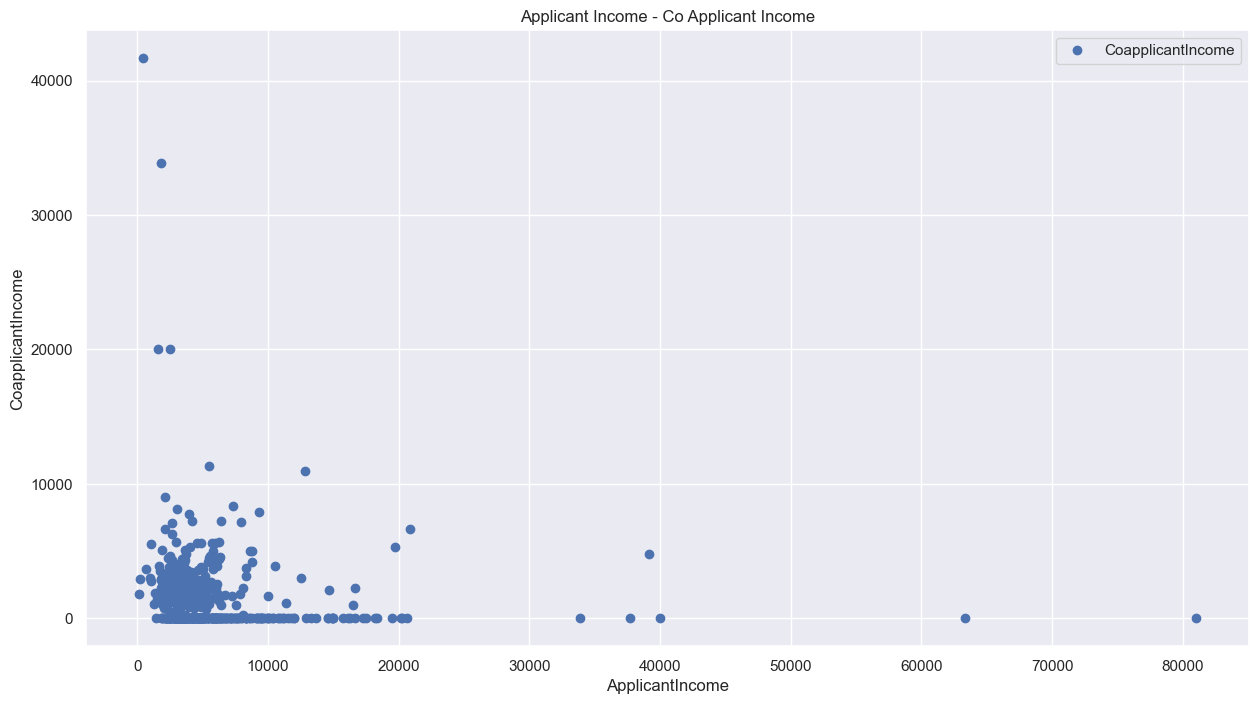

Pearson correlation: -0.10923451445923542
T Test and P value: 
 Ttest_indResult(statistic=13.740436172213247, pvalue=5.392317185486236e-40)


In [142]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

- There is negative correlation between Applicant income and Co Applicant Income.

<Axes: >

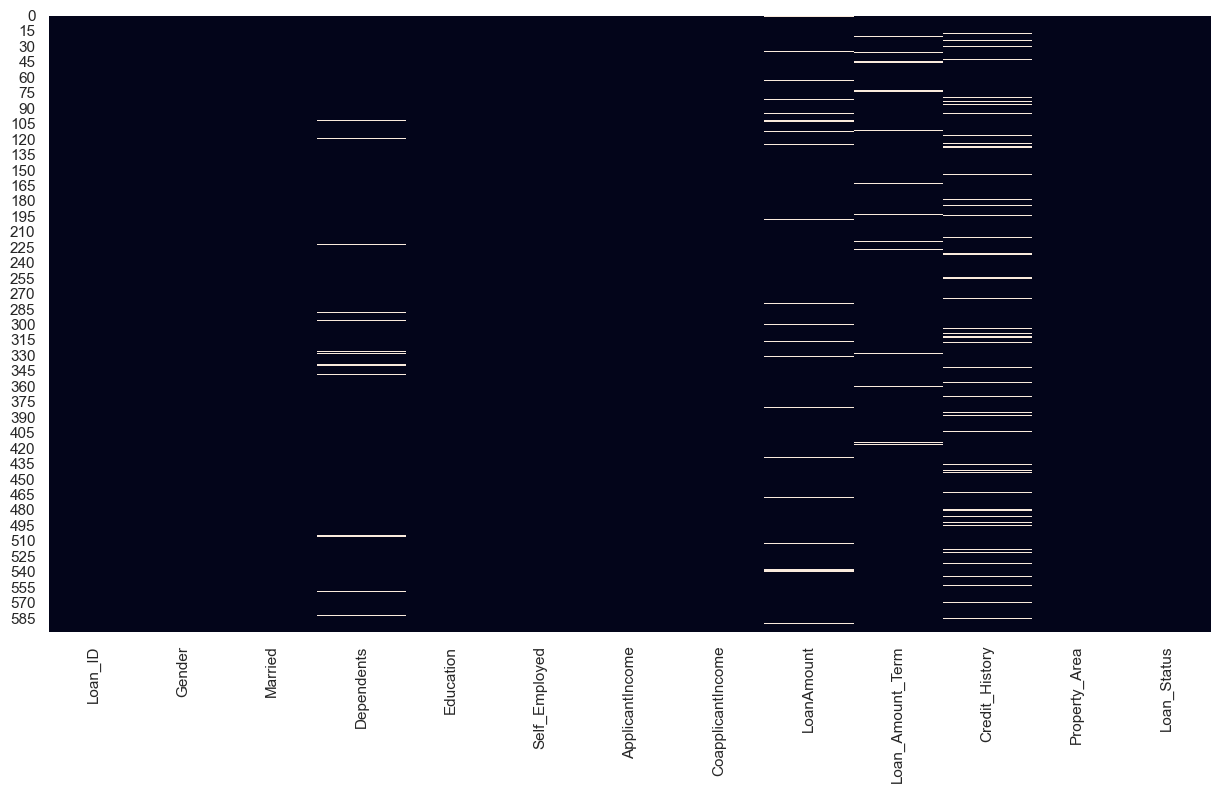

In [145]:
# Null Values
sns.heatmap(df.isnull(), cbar=False)

In [147]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

# Data Preprocessing

In [150]:
#drop the field 'Loan_ID'
df.drop('Loan_ID', axis=1, inplace=True)

## Data Imputation

In [153]:
# Categorical using Mode
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [155]:
# Numerical values using mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [157]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# One-hot Encoding

In [163]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

# Remove Outliers & Infinite values 

In [166]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 -Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Skewed Distribution Treatment

In [169]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

<Axes: xlabel='LoanAmount', ylabel='Count'>

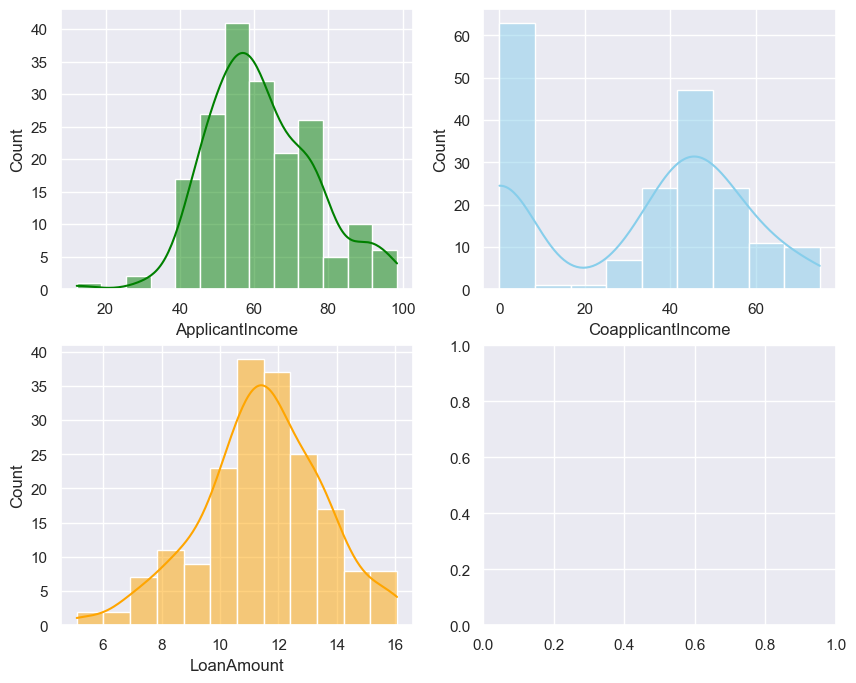

In [171]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')

**As can be seen, the distribution after using log transformation are much better compared to original distribution.**

# Features Separating

**Dependent features (Loan_Status) will be seperated from independent features**

In [178]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

# SMOTE Technique
- It can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting,

In [183]:
from imblearn.over_sampling import SMOTE

In [185]:
X, y = SMOTE().fit_resample(X, y)

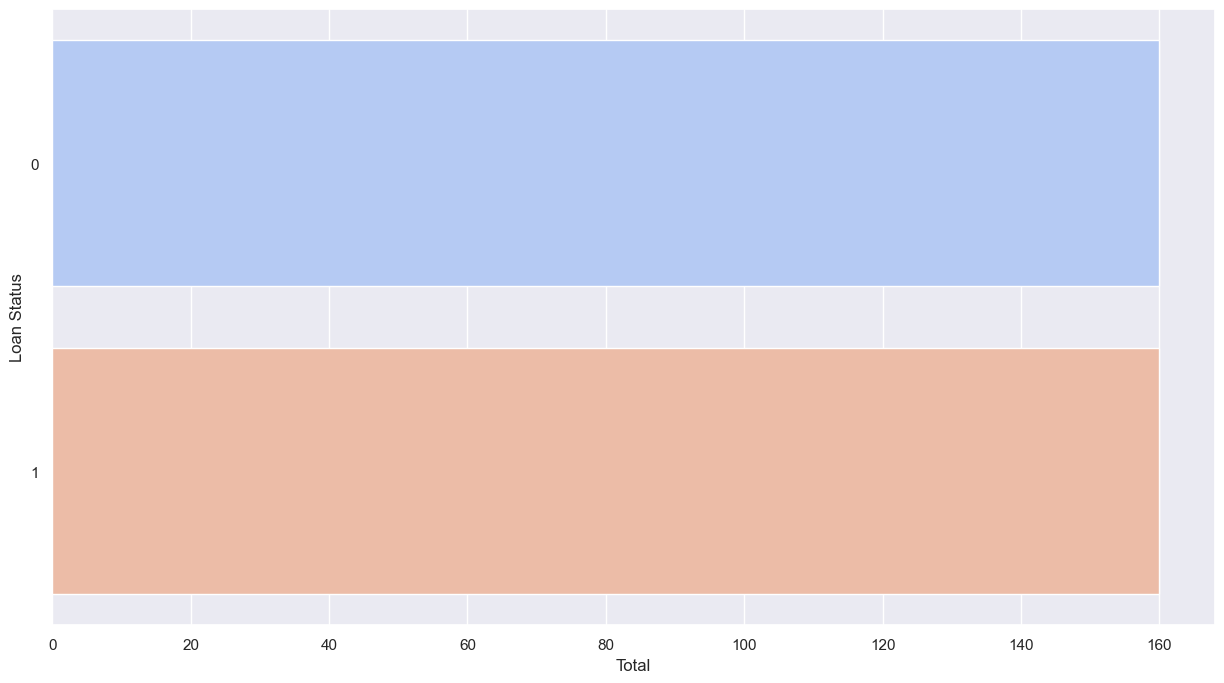

In [187]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

**The distrubtion of Loan status are now balanced.**

# Data Normalization

In [191]:
from sklearn.preprocessing import MinMaxScaler

In [193]:
X = MinMaxScaler().fit_transform(X)

# Splitting Data Set 

In [196]:
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 10)

print("X_train",X_train.shape)
print("y_train",y_train.shape)

print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (256, 13)
y_train (256,)
X_test (64, 13)
y_test (64,)


# Models

In [233]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, cohen_kappa_score, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [235]:
def get_test_report(model):
    return(classification_report(y_test, y_pred))

In [237]:
def kappa_score(model):
    return(cohen_kappa_score(y_test, y_pred))

In [239]:
def plot_confusion_matrix(model):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [241]:
def plot_roc(model):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC Curve for Heart Disease Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [243]:
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

## Logistic Regression

In [219]:
lr = LogisticRegression(solver='saga', max_iter=500, random_state=10)
lr_model = lr.fit(X_train, y_train)

In [223]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]

In [225]:
y_pred_prob

array([0.89083091, 0.65908481, 0.68109007, 0.89394541, 0.46553173,
       0.69090555, 0.69137697, 0.79803343, 0.08963026, 0.89540602,
       0.64679992, 0.0813943 , 0.89029469, 0.48883113, 0.09304137,
       0.42875446, 0.64868538, 0.69346809, 0.45704717, 0.6666084 ,
       0.64109582, 0.08157036, 0.6955731 , 0.65544874, 0.0937494 ,
       0.17976293, 0.77795301, 0.70235563, 0.09706703, 0.695224  ,
       0.47439498, 0.89163872, 0.1826728 , 0.43688908, 0.19489474,
       0.89643675, 0.79228269, 0.18284383, 0.68113145, 0.09013037,
       0.67910767, 0.48295894, 0.43431527, 0.65801133, 0.08650579,
       0.43765126, 0.46203222, 0.43496282, 0.09399504, 0.66454779,
       0.19514252, 0.44590856, 0.4236062 , 0.90055778, 0.8878341 ,
       0.79139992, 0.654164  , 0.43090961, 0.1849165 , 0.77297283,
       0.76791066, 0.43188301, 0.7895089 , 0.19462999])

In [227]:
y_pred = lr_model.predict(X_test)

In [229]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0],
      dtype=uint8)

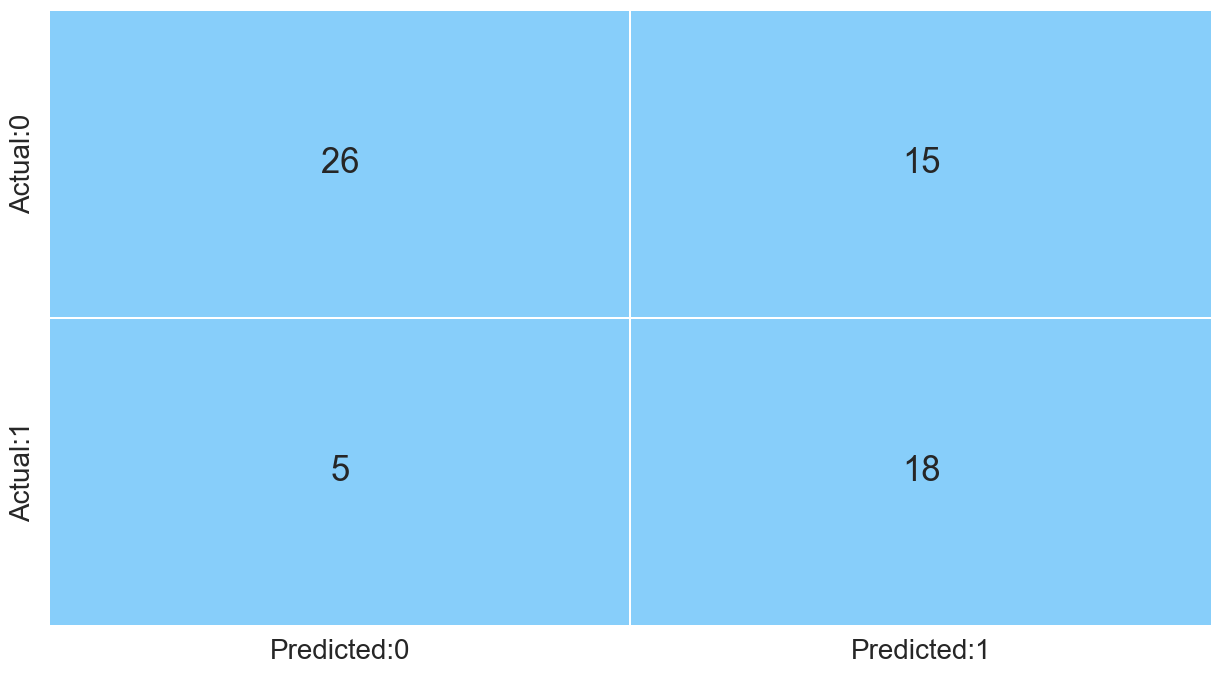

In [245]:
plot_confusion_matrix(lr_model)

In [247]:
test_report = get_test_report(lr_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.63      0.72        41
           1       0.55      0.78      0.64        23

    accuracy                           0.69        64
   macro avg       0.69      0.71      0.68        64
weighted avg       0.73      0.69      0.69        64



In [253]:
kappa_value = kappa_score(lr_model)
print(kappa_value)

0.3804453049370765


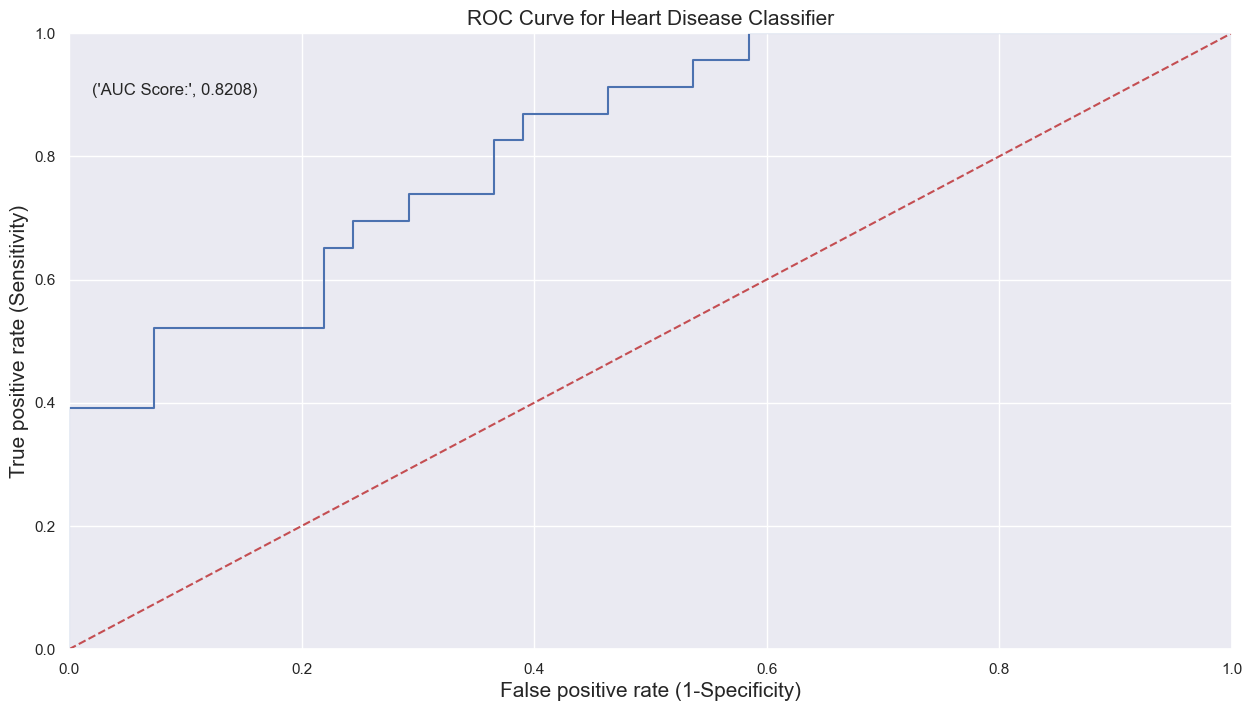

In [255]:
plot_roc(lr_model)

In [257]:
update_score_card(model_name= 'Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.820785,0.545455,0.782609,0.6875,0.380445,0.642857


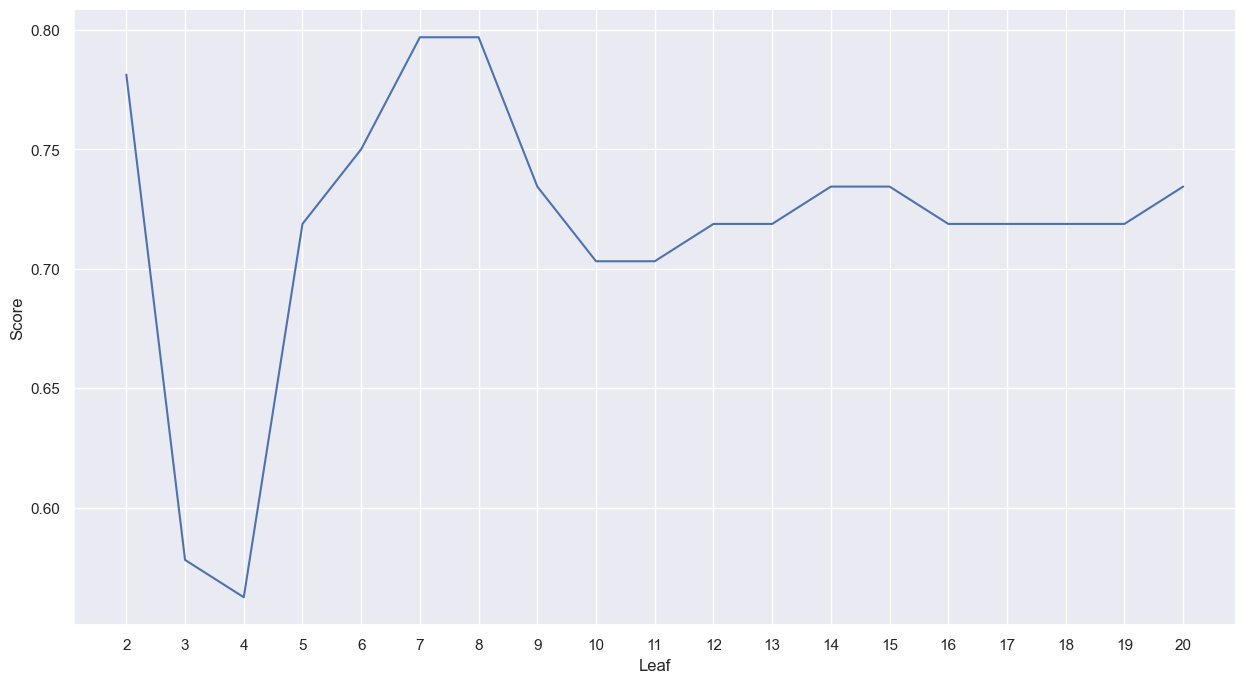

Decision Tree Accuracy: 79.69%


In [261]:
# Decision Tree

scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

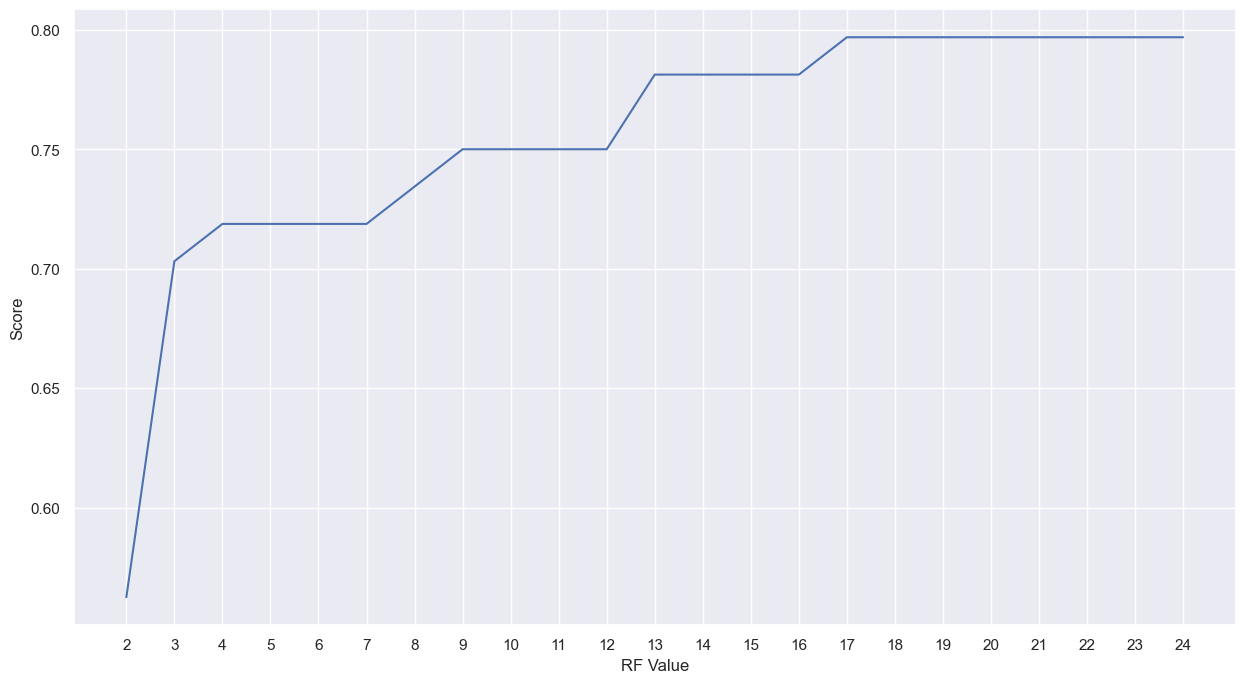

Random Forest Accuracy:  79.69%


In [283]:
# Random Forest

scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [285]:
# Gradient Bossting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [287]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [289]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [291]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=2, max_leaf_nodes=40, n_estimators=400,
                           subsample=0.5)
0.8903846153846153
{'subsample': 0.5, 'n_estimators': 400, 'max_leaf_nodes': 40, 'max_depth': 2}
0


In [293]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        41
           1       0.66      0.83      0.73        23

    accuracy                           0.78        64
   macro avg       0.77      0.79      0.77        64
weighted avg       0.80      0.78      0.79        64

[[31 10]
 [ 4 19]]
Gradient Boosting accuracy: 78.12%


# Model Comparison

In [296]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Decision Tree,79.6875
2,Random Forest,79.6875
3,Gradient Boost,78.1250
0,Logistic Regression,68.7500


**The highest accuracy is 79.68%.**